In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch.univariate import ARCH, GARCH, ARX
from arch import arch_model

## Cases for Spurious Regression
### Case 1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     58.07
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           1.62e-11
Time:                        00:07:07   Log-Likelihood:                -246.52
No. Observations:                 100   AIC:                             497.0
Df Residuals:                      98   BIC:                             502.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9089      0.343     17.211      0.0

Text(0, 0.5, '$e_t$')

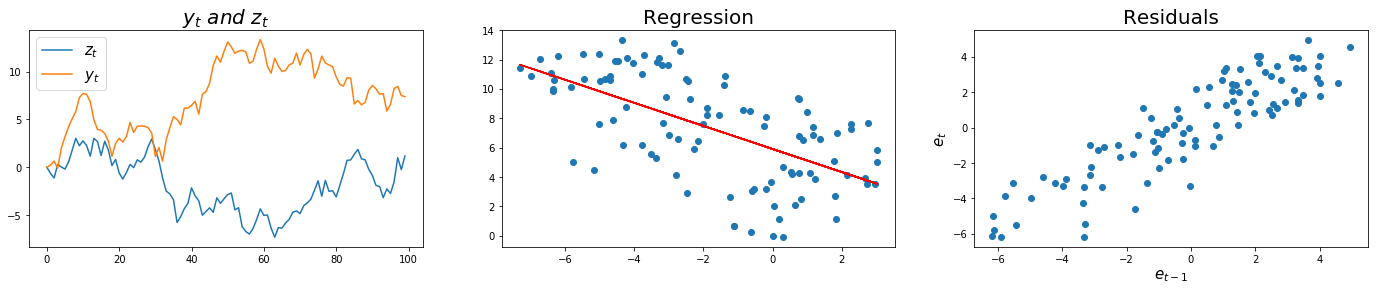

In [116]:
# Generate data
rand1 = np.random.normal(0,1,100)
rand2 = np.random.normal(0,1,100)
z_t = [0]
y_t = [0]
for i in range(1,100):
    # random walk
    y_t.append(y_t[i-1] + rand1[i-1] )
    z_t.append(z_t[i-1] + rand2[i-1] )
    # random walk with drift
    # y_t.append(0.2+y_t[i-1] + rand1[i-1] )
    # z_t.append(-0.1+z_t[i-1] + rand2[i-1] )
    
# run ols on the y and z
X = sm.add_constant(z_t)
m1 = sm.OLS(y_t,X).fit()
print(m1.summary())

# test the residuals for correlation
m2 = sm.tsa.ARMA(m1.resid,order=(1,0)).fit(trend="nc")
print(m2.summary())

fig,axes = plt.subplots(1,3,figsize = (24,4))
axes[0].plot(z_t,label = r'$z_t$')
axes[0].plot(y_t,label = r"$y_t$" )
axes[0].set_title(r"$ y_t \ and \ z_t $",fontsize = 20)
axes[0].legend(fontsize = 15)
axes[1].scatter(z_t,y_t)
axes[1].plot(z_t,m1.predict(),c="r")
axes[1].set_title("Regression",fontsize = 20)
axes[2].scatter(m1.resid[:-1],m1.resid[1:])
axes[2].set_title("Residuals",fontsize = 20)
axes[2].set_xlabel(r"$e_{t-1}$",fontsize = 15)
axes[2].set_ylabel(r"$e_t$",fontsize = 15)

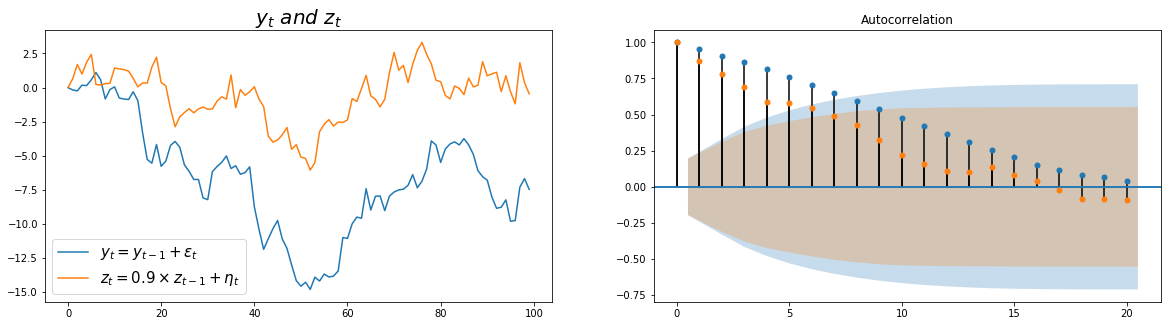

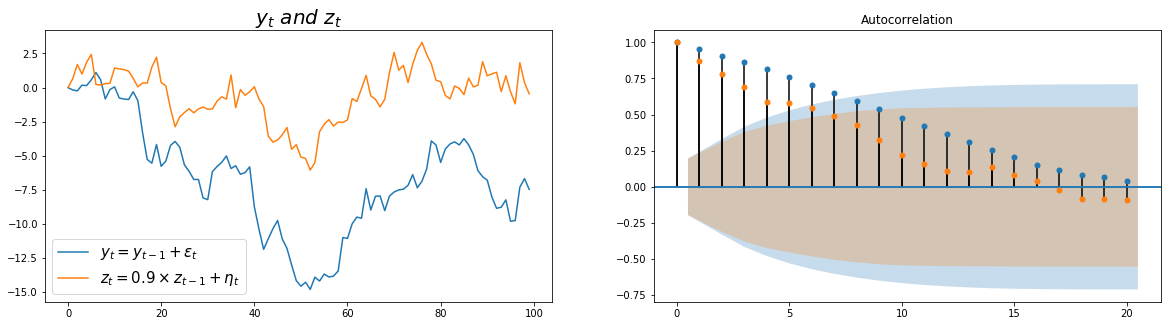

In [129]:
rand1 = np.random.normal(0,1,100)
rand2 = np.random.normal(0,1,100)
z_t = [0]
y_t = [0]
for i in range(1,100):
    # random walk
    y_t.append(y_t[i-1] + rand1[i-1] )
    z_t.append(0.9 * z_t[i-1] + rand2[i-1] )
fig,axes = plt.subplots(1,2,figsize=(20,5))
axes[0].plot(y_t,label = r"$y_t = y_{t-1} + \varepsilon_t$" )
axes[0].plot(z_t,label = r'$z_t = 0.9 \times z_{t-1} + \eta_t$')
axes[0].set_title(r"$ y_t \ and \ z_t $",fontsize = 20)
axes[0].legend(fontsize = 15)
sm.graphics.tsa.plot_acf(np.array(y_t),ax = axes[1])
sm.graphics.tsa.plot_acf(np.array(z_t),ax = axes[1])

### Case 2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     28.58
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           5.86e-07
Time:                        14:00:05   Log-Likelihood:                -346.93
No. Observations:                 100   AIC:                             697.9
Df Residuals:                      98   BIC:                             703.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4461      1.822      2.441      0.0

Text(0, 0.5, '$e_t$')

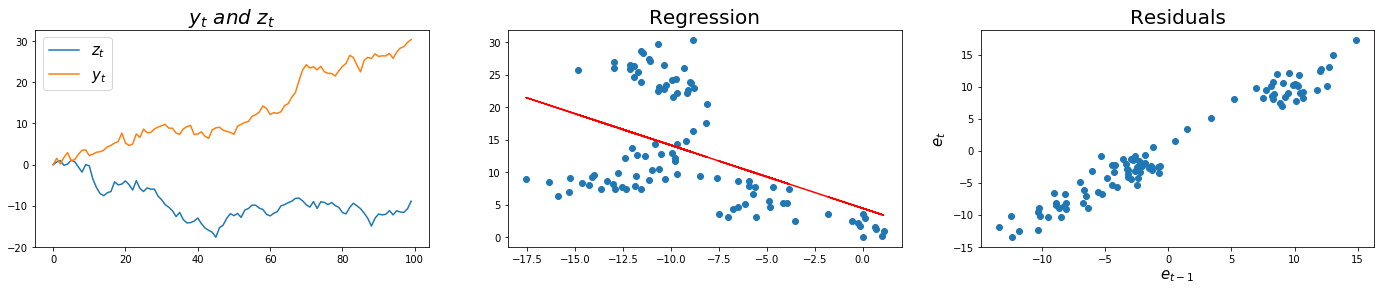

In [120]:
# Generate data
rand1 = np.random.normal(0,1,100)
rand2 = np.random.normal(0,1,100)
z_t = [0]
y_t = [0]
for i in range(1,100):
    y_t.append(0.2+y_t[i-1] + rand1[i-1] )
    z_t.append(-0.1+z_t[i-1] + rand2[i-1] )

# run ols on the y and z
X = sm.add_constant(z_t)
m1 = sm.OLS(y_t,X).fit()
print(m1.summary())

# test the residuals for correlation
m2 = sm.tsa.ARMA(m1.resid,order=(1,0)).fit(trend="nc")
print(m2.summary())

fig,axes = plt.subplots(1,3,figsize = (24,4))
axes[0].plot(z_t,label = r'$z_t$')
axes[0].plot(y_t,label = r"$y_t$" )
axes[0].set_title(r"$ y_t \ and \ z_t $",fontsize = 20)
axes[0].legend(fontsize = 15)
axes[1].scatter(z_t,y_t)
axes[1].plot(z_t,m1.predict(),c="r")
axes[1].set_title("Regression",fontsize = 20)
axes[2].scatter(m1.resid[:-1],m1.resid[1:])
axes[2].set_title("Residuals",fontsize = 20)
axes[2].set_xlabel(r"$e_{t-1}$",fontsize = 15)
axes[2].set_ylabel(r"$e_t$",fontsize = 15)

## DF test
### Generate DF-distribution by Monte-Carlo 

In [273]:
def get_pct(T,iteration = 10000,constant = True,trend = True):
    lag_value = []
    index = range(0,iteration)
    
    while iteration>0:
        iteration -=1
        # generate 150 random number 
        rand1 = np.random.normal(0,1,T+50)
        y_t = [0]
        # construct series y_t
        for i in range(1,T+51):
            y_t.append(y_t[i-1] + rand1[i-1] )
        # abandon the first 50 number to obtain accuracy
        y_t = np.array(y_t[-T:])
        # construct \delta_y and y_{t-1}
        y_t_1 = y_t[:-1]
        d_y = y_t[1:] - y_t_1
        if constant == True and trend == False:
            x = sm.add_constant(y_t_1)
            m = sm.OLS(d_y,x).fit()
            lag_value.append(m.tvalues[1])
        if constant == True and trend == True:
            x = sm.add_constant(y_t_1)
            time = np.arange(x.shape[0])
            np.column_stack((x,time))
            m = sm.OLS(d_y,x).fit()
            lag_value.append(m.tvalues[1])
        else:
            x = y_t_1
        # estimate \delta y_t = a_0 + \gamma y_{t-1} + e_t
            m = sm.OLS(d_y,x).fit()
            lag_value.append(m.tvalues[0])
    # sort the t_value
    DF = pd.DataFrame(lag_value).sort_values(by=0)
    DF.index = index
    # obtain the thresholds
    pct = [0.01,0.025,0.05,0.1]
    tre = []
    for p in pct:
        n = int(DF.shape[0] * (1-p))
        tre.append(DF.iloc[-n,0])
    thred = pd.DataFrame(tre).T
    thred.columns = pct
    thred.index = [T]
    return thred.round(2),DF.round(2)

In [147]:
distribution = pd.DataFrame(columns=[0.01,0.025,0.05,0.1])
sample = [25,50,100,250,300,5000]
for s in sample:
    thred,DF = get_pct(s,iteration=30000)
    distribution = distribution.append(thred)

In [149]:
thred,DF = get_pct(100)

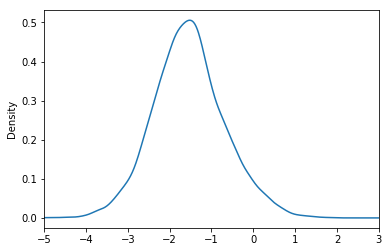

In [155]:
DF.plot(kind = "kde",xlim=(-5,3),legend=False)

## ADF Test for real consumption in china

In [305]:
cons = pd.read_excel("./data/Consumption.xls",index_col="Year")
rcon = cons['Rcon']

D:\anaconda\envs\dataServer\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(-20, 100)

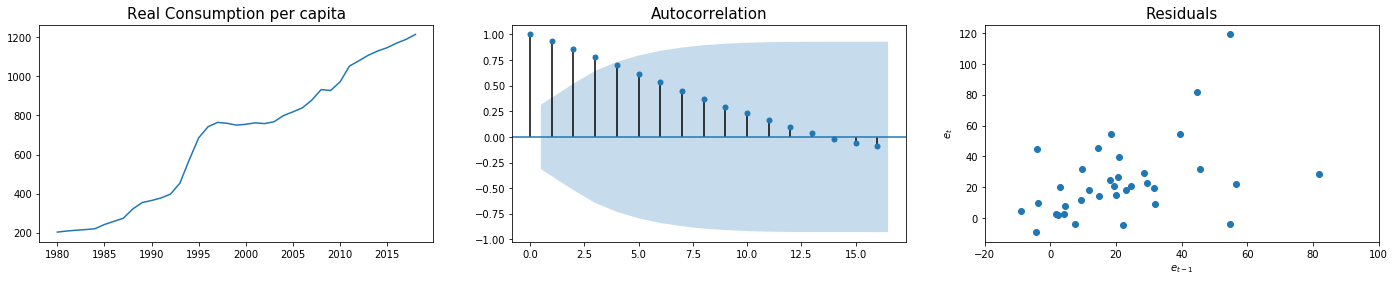

In [215]:
# graphs of the data
fig,axes = plt.subplots(1,3,figsize=(24,4))
axes[0].plot(rcon)
axes[0].set_title("Real Consumption per capita",fontsize = 15)
sm.graphics.tsa.plot_acf(rcon,ax=axes[1])
axes[1].set_title("Autocorrelation",fontsize = 15)

ar1 = sm.tsa.ARMA(rcon,order=(1,0)).fit()
axes[2].scatter(ar1.resid[:-1],ar1.resid[1:])
axes[2].set_title("Residuals",fontsize = 15)
axes[2].set_xlabel(r"$e_{t-1}$")
axes[2].set_ylabel(r"$e_t$")
axes[2].set_xlim(-20,100)

In [301]:
# ADF test for Rcon
"""
statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)[source]

  regression{‘c’,’ct’,’ctt’,’nc’}
    Constant and trend order to include in regression
        ‘c’ : constant only (default)
        ‘ct’ : constant and trend
        ‘ctt’ : constant, and linear and quadratic trend
        ‘nc’ : no constant, no trend
  regresults: y_{t-1}, \Delta y_{t-1},...,\Delta y_{t-1},constant,t,t^2
"""
# test for contant and trend
def adf_test(data,title):
    m3 = sm.tsa.stattools.adfuller(data,regression="ct")
    m2 = sm.tsa.stattools.adfuller(data,regression="c")
    m1 = sm.tsa.stattools.adfuller(data,regression="nc")
    print("{:^40}".format("Results of " + title) )
    print("-"*40)
    print("{:^10}{:^10}{:^10}{:^10}".format('','M3',"M2","M1"))
    print("{:^10}{:^10}{:^10}{:^10}".format('lags',m3[2],m2[2],m1[2]))
    print("{:^10}{:^10}{:^10}{:^10}".format('stats',m3[0].round(3),m2[0].round(3),m1[0].round(3)))
    print("{:^10}{:^10}{:^10}{:^10}".format('p-value',m3[1].round(3),m2[1].round(3),m1[1].round(3)))
    print("{:^10}{:^10}{:^10}{:^10}".format('1%',m3[4]["1%"].round(3),m2[4]["1%"].round(3),m1[4]["1%"].round(3)))
    print("{:^10}{:^10}{:^10}{:^10}".format('5%',m3[4]["5%"].round(3),m2[4]["5%"].round(3),m1[4]["5%"].round(3)))
    print("{:^10}{:^10}{:^10}{:^10}".format('10%',m3[4]["10%"].round(3),m2[4]["10%"].round(3),m1[4]["10%"].round(3)))
    print("-"*40)
adf_test(rcon,"rcon")

            Results of rcon             
----------------------------------------
              M3        M2        M1    
   lags       1         2         2     
  stats     -3.43     -0.362    1.966   
 p-value    0.048     0.916     0.989   
    1%      -4.227    -3.627    -2.631  
    5%      -3.537    -2.946    -1.95   
   10%       -3.2     -2.612    -1.611  
----------------------------------------


In [297]:
m3 = sm.tsa.stattools.adfuller(rcon,regression="ct",regresults=True)[-1]
m3.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     12.31
Date:                Tue, 20 Aug 2019   Prob (F-statistic):           1.45e-05
Time:                        19:45:15   Log-Likelihood:                -162.75
No. Observations:                  37   AIC:                             333.5
Df Residuals:                      33   BIC:                             339.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2129      0.062     -3.430      0.002      -0.339      -0.087
x2             0.6851      0.122      5.616      0.000       0.437       0.933
const         36.6455     10.490      3.493      0.001      15.304      57.987
x3             6.1912      1.835      3.373      0.002       2.457       9.925
==============================================================================
Omnibus:                        5.974   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.537
Skew:                           0.343   Prob(JB):                       0.0381
Kurtosis:                       4.941   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [319]:
rcon_d1 = rcon.diff()[1:]
adf_test(rcon_d1,"fisrt-order difference of rcon")

Results of fisrt-order difference of rcon
----------------------------------------
              M3        M2        M1    
   lags       3         3         0     
  stats     -3.524    -3.608    -2.024  
 p-value    0.037     0.006     0.041   
    1%      -4.253    -3.639    -2.629  
    5%      -3.549    -2.951    -1.95   
   10%      -3.207    -2.614    -1.611  
----------------------------------------


D:\anaconda\envs\dataServer\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


(-20, 100)

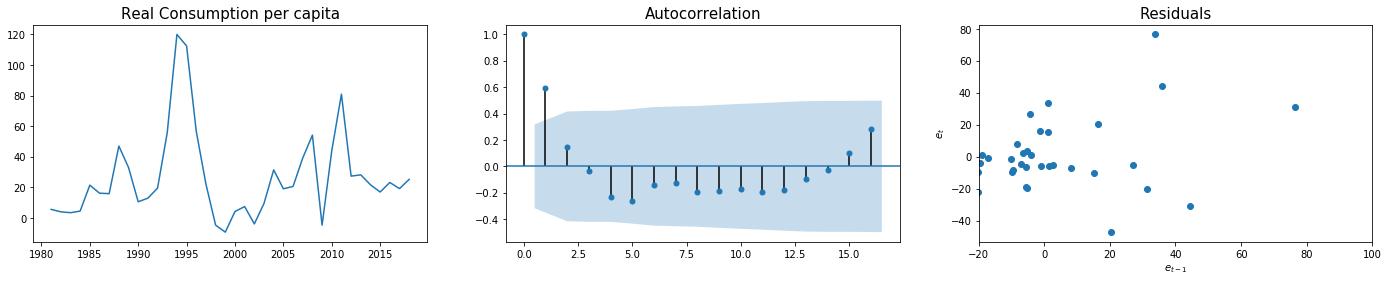

In [293]:
# graphs of the data
fig,axes = plt.subplots(1,3,figsize=(24,4))
axes[0].plot(rcon_d1)
axes[0].set_title("Real Consumption per capita",fontsize = 15)
sm.graphics.tsa.plot_acf(rcon_d1,ax=axes[1])
axes[1].set_title("Autocorrelation",fontsize = 15)

ar1 = sm.tsa.ARMA(rcon_d1,order=(1,0)).fit()
axes[2].scatter(ar1.resid[:-1],ar1.resid[1:])
axes[2].set_title("Residuals",fontsize = 15)
axes[2].set_xlabel(r"$e_{t-1}$")
axes[2].set_ylabel(r"$e_t$")
axes[2].set_xlim(-20,100)

In [320]:
rcon_g = cons["growth"][1:]
rcon_l = np.log(rcon)
adf_test(rcon_g,"growth rate of rcon")
adf_test(rcon_l,"logarithm of rcon")

     Results of growth rate of rcon     
----------------------------------------
              M3        M2        M1    
   lags       1         1         4     
  stats     -3.876    -3.472    -1.152  
 p-value    0.013     0.009     0.227   
    1%      -4.235    -3.627    -2.637  
    5%      -3.54     -2.946    -1.951  
   10%      -3.202    -2.612    -1.611  
----------------------------------------
      Results of logarithm of rcon      
----------------------------------------
              M3        M2        M1    
   lags       2         2         5     
  stats     -1.235    -1.916    0.928   
 p-value    0.903     0.325     0.906   
    1%      -4.235    -3.627    -2.637  
    5%      -3.54     -2.946    -1.951  
   10%      -3.202    -2.612    -1.611  
----------------------------------------


In [318]:
rcon_ld = rcon_l.diff()[1:]
adf_test(rcon_ld,"fisrt-order difference of log(rcon)")

Results of fisrt-order difference of log(rcon)
----------------------------------------
              M3        M2        M1    
   lags       1         1         4     
  stats     -3.835    -3.423    -1.152  
 p-value    0.015      0.01     0.227   
    1%      -4.235    -3.627    -2.637  
    5%      -3.54     -2.946    -1.951  
   10%      -3.202    -2.612    -1.611  
----------------------------------------


## Business Cycle (Nelson and Plosser,1982)

In [50]:
Data = pd.read_excel('./data/nelson-plosser 1982.xls',index_col='year')

In [99]:
rgnp = Data['rgnp'].dropna()
time = rgnp.index
x = np.column_stack((time,time**2))
x = sm.add_constant(x)
m = sm.OLS(rgnp,x).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rgnp   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1335.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):           7.52e-50
Time:                        16:02:32   Log-Likelihood:                -290.68
No. Observations:                  62   AIC:                             587.4
Df Residuals:                      59   BIC:                             593.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.326e+05    4.5e+04     16.290      0.000    6.43e+05    8.23e+05
x1          -764.6088     46.382    -16.485      0.000    -857.420    -671.798
x2             0.1995      0.012     16.687      0.000       0.176       0.223
==============================================================================
Omnibus:                        2.782   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.541
Skew:                           0.491   Prob(JB):                        0.281
Kurtosis:                       2.861   Cond. No.                     4.94e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Business Cycle ?')

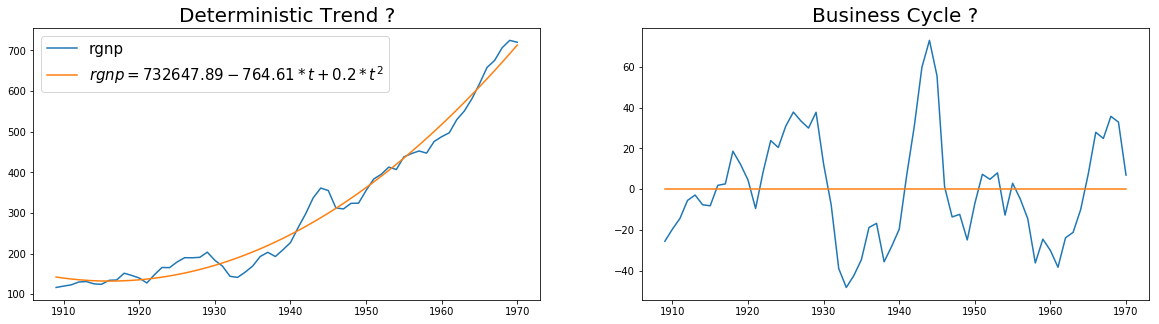

In [113]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
axes[0].plot(time,rgnp,label="rgnp")
axes[0].plot(time,m.predict(),label=r"$rgnp = 732647.89 -764.61 *t +0.2*t^2$")
axes[0].legend(fontsize=15)
axes[0].set_title('Deterministic Trend ?',fontsize=20)
axes[1].plot(m.resid)
axes[1].plot(time,np.zeros_like(time))
axes[1].set_title('Business Cycle ?',fontsize=20)

### Evidence from autocorrelation

In [192]:
var = Data.columns[14:]
result = pd.DataFrame(columns=var)
for v in var:
    tmp = Data[v].dropna()
    n = tmp.shape[0]
    a = sm.tsa.acf(tmp,fft=True)
    b = np.hstack(([n],a[1:7].round(2)))
    result[v] = b

result.index = ["T",'r1','r2','r3','r4','r5','r6']
result = result.T
result.to_excel('./Results/exp10-1.xlsx')
result

,T,r1,r2,r3,r4,r5,r6
lrgnp,62.0,0.95,0.90,0.84,0.79,0.74,0.69
lgnp,62.0,0.95,0.89,0.83,0.77,0.72,0.67
lpcrgnp,62.0,0.95,0.88,0.81,0.75,0.70,0.65
lip,111.0,0.97,0.94,0.90,0.87,0.84,0.81
lemp,81.0,0.96,0.91,0.86,0.81,0.76,0.71
lun,81.0,0.75,0.47,0.32,0.17,0.04,-0.01
lprgnp,82.0,0.96,0.93,0.89,0.84,0.80,0.76
lcpi,111.0,0.96,0.92,0.87,0.84,0.80,0.77
lwg,71.0,0.96,0.91,0.86,0.82,0.77,0.73
lrwg,71.0,0.96,0.92,0.88,0.84,0.80,0.75


In [220]:
d_Data = Data.diff()
result = pd.DataFrame(columns=var)
for v in var:
    tmp = d_Data[v].dropna()
    n = tmp.shape[0]
    a = sm.tsa.acf(tmp,fft=True)
    b = np.hstack(([n],a[1:7].round(2)))
    result[v] = b

result.index = ["T",'r1','r2','r3','r4','r5','r6']
result = result.T
result.to_excel('./Results/exp10-2.xlsx')
result

PermissionError: [Errno 13] Permission denied: './Results/exp10-2.xlsx'

### Evidence from Detrending

In [221]:
deviation = pd.DataFrame(columns=var)
for v in var:
    tmp = Data[v].dropna()
    time = tmp.index
    n = tmp.shape[0]
    x = sm.add_constant(time)
    m = sm.OLS(tmp,x).fit().resid
    a = sm.tsa.acf(m,fft=True)
    b = np.hstack(([n],a[1:7].round(2)))
    deviation[v] = b
deviation.index = ["T",'r1','r2','r3','r4','r5','r6']
deviation = deviation.T
deviation.to_excel('./Results/exp10-3.xlsx')

### Evidence from ADF test

In [253]:
ADF = pd.DataFrame(columns=var)
for v in var:
    tmp = Data[v].dropna()
    n = tmp.shape[0]
    m1 = sm.tsa.adfuller(tmp,regression="ct")
    m2 = sm.tsa.adfuller(tmp,regression="ct",regresults=True)[-1].resols
    k = m1[2]
    a_0 = m2.params[-2].round(3)
    a_2 = m2.params[-1].round(3)
    gamma = m2.params[0].round(3)
    a_0_t = m2.tvalues[-2].round(3)
    a_2_t = m2.tvalues[-1].round(3)
    a_2_p = m2.pvalues[-1].round(3)
    gamma_t = m2.tvalues[0].round(3)
    
    lit = [n,k,a_0,a_0_t,a_2,a_2_t,a_2_p,gamma,gamma_t,1+gamma]
    ADF[v] = lit
index = ["T","lags","a_0",'t(a_0)',"a_2",'t(a_2)','p(a_2)',"gamma",'t(gamma)','a_1']
ADF.index=index
ADF = ADF.T
ADF.to_excel('./Results/exp10-4.xlsx')

In [252]:
m2.pvalues

array([0.00935697, 0.00814293, 0.04111478, 0.00612196])

,T,lags,a_0,t(a_0),a_2,t(a_1),gamma,t(gamma),a_1
lrgnp,62.0,1.0,0.819,3.036,0.006,3.033,-0.175,-2.994,0.825
lgnp,62.0,1.0,1.062,2.370,0.006,2.338,-0.101,-2.321,0.899
lpcrgnp,62.0,1.0,1.278,3.054,0.004,3.007,-0.182,-3.045,0.818
lip,111.0,1.0,0.054,2.789,0.008,3.288,-0.181,-3.363,0.819
lemp,81.0,1.0,1.554,3.156,0.002,2.965,-0.153,-3.129,0.847
lun,81.0,3.0,0.514,2.810,-0.000,-0.226,-0.294,-3.552,0.706
lprgnp,82.0,1.0,0.260,2.550,0.002,2.650,-0.085,-2.516,0.915
lcpi,111.0,2.0,0.071,1.336,0.000,2.046,-0.024,-1.441,0.976
lwg,71.0,1.0,0.596,2.587,0.004,2.564,-0.096,-2.524,0.904
lrwg,71.0,1.0,0.488,3.100,0.004,3.140,-0.169,-3.049,0.831
